**PROBLEM** : Classification of corrosion severity levels. By utilizing different Machine Learning algorithms and their hyperparameter optimization to present the best performing moddel.



Sanaullah Shah + Herbert + Jasmine   LISUM11        Data Science     iamkadhimi@gmail.com     Pakistan        NUST, Islamabad

# week 12

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(r'C:\Users\User1\Desktop\MLData.xlsx')
df.head()

,Sample#,Target,Weight before[g],Weight After[g],Weight Loss[g],%Weight Loss,Thickness Before [mm],Thickness After[mm],Thickness Loss[mm],% Thickness Loss,Time(hrs),Surface Area[L*W]
0,1,A,75.00,72.92,2.08,2.773333,6.20,5.99,0.21,3.387097,1,2.25
1,2,A,74.37,72.14,2.23,2.998521,6.25,6.01,0.24,3.840000,1,2.25
2,3,A,66.70,64.56,2.14,3.208396,6.12,5.97,0.15,2.450980,1,2.25
3,4,A,67.68,64.83,2.85,4.210993,6.08,5.94,0.14,2.302632,1,2.25
4,5,A,64.51,62.35,2.16,3.348318,6.14,5.93,0.21,3.420195,1,2.25


In [14]:
Xr = df[['Weight Loss[g]','%Weight Loss','Thickness Loss[mm]','% Thickness Loss','Time(hrs)']]

In [15]:
yr = df['Time(hrs)']

In [16]:
Xr.head()

,Weight Loss[g],%Weight Loss,Thickness Loss[mm],% Thickness Loss,Time(hrs)
0,2.08,2.773333,0.21,3.387097,1
1,2.23,2.998521,0.24,3.840000,1
2,2.14,3.208396,0.15,2.450980,1
3,2.85,4.210993,0.14,2.302632,1
4,2.16,3.348318,0.21,3.420195,1


# Feature Engineering Through Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(Xr_Train, yr_Train)

RandomForestClassifier(random_state=0)

In [22]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=Xr_Train.columns).sort_values(ascending=False)

feature_scores

%Weight Loss          0.219209
Weight Loss[g]        0.209953
% Thickness Loss      0.209750
Time(hrs)             0.201558
Thickness Loss[mm]    0.159530
dtype: float64

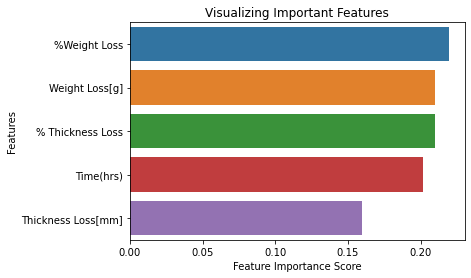

In [23]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()


# Random Forest Classifier 

In [24]:
from sklearn.model_selection import train_test_split
Xr_Train, Xr_Test,yr_Train,yr_Test = train_test_split(Xr, yr, test_size = 0.3, random_state = 42)

In [28]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

rfc_100.fit(Xr_Train, yr_Train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(Xr_Test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'.format(accuracy_score(yr_Test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8667


In [29]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yr_Test, y_pred_100)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 0 0 0]
 [0 2 0 0]
 [0 0 3 2]
 [0 0 0 4]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(yr_Test, y_pred_100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.60      0.75         5
           4       0.67      1.00      0.80         4

    accuracy                           0.87        15
   macro avg       0.92      0.90      0.89        15
weighted avg       0.91      0.87      0.86        15



In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, Xr, yr, cv= 10)

In [32]:
score

array([0.8 , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75])

In [33]:
score.mean()

0.9550000000000001

# XGBOOST

In [34]:
xg = df[['Weight Loss[g]','%Weight Loss','Thickness Loss[mm]','% Thickness Loss','Time(hrs)']]

In [35]:
yg = df['Time(hrs)']

In [36]:
from sklearn.model_selection import train_test_split

xg_train, xg_test, yg_train, yg_test = train_test_split(xg, yg, test_size = 0.3, random_state = 123)

# Hyperparameter Optimization

In [37]:
# declare parameters
params = {
    'max_depth': [3,4,5,6,8,10,12,15],
    'learning_rate': [0.1,.2,.25,.3],
    'n_estimators': [10,25,50,100],
    'gamma': [0.0,0.1,0.2,0.3,0.4]
                      }     


In [38]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

C:\Users\User1\anaconda3\envs\corrosion\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [39]:
classifier = xgboost.XGBClassifier()

In [40]:
ran_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [41]:
ran_search.fit(xg,yg)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\User1\anaconda3\envs\corrosion\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User1\anaconda3\envs\corrosion\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User1\anaconda3\envs\corrosion\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\Users\User1\anaconda3\envs\corrosion\lib\site-packages\xgboost\sklearn.py", line 1231, in fit
    train_dmatrix, evals = _wrap_evaluation_mat

ValueError: feature_names must be string, and may not contain [, ] or <

In [42]:
ran_search.best_estimator_

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0.2, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=6,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [43]:
ran_search.best_params_

{'n_estimators': 10, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.2}

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier 
xgb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=.2 ,max_depth=3).fit(xg_train,yg_train)

In [45]:
xgb_clf.score(xg_test, yg_test)

1.0

In [46]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_clf, xg, yg, cv= 10)

In [47]:
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
score.mean()

1.0

# Part Two Complete